# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
from pprint import pprint
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'City count: {len(cities)}')

City count: 591


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
cloudiness = []
country = []
date1 = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_Speed = []
error_city = []

cnum = 1
for city in cities:
    print(f'The data of city with number: {cnum} and name: {city} is getting retreived')
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    time.sleep(1)
    
    try:
        city_name.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date1.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_Speed.append(response['wind']['speed'])
        print(f'The data of city with number: {cnum} and name: {city} is successfully retreived')   
    except:
        error_city.append(city)
        city_name.pop()
        print(f'The data of city with number: {cnum} and name: {city} is not found!\n Removing from the list')
    cnum +=1

print(f'\nThe weather data of {len(cities)} cities has been requested!\n')
print(f'The weather data of {len(error_city)} cities cannot be retreived!\n')
print(f'The weather data of {len(city_name)} cities has been successfully retrieved')

The data of city with number: 1 and name: belushya guba is getting retreived
The data of city with number: 1 and name: belushya guba is not found!
 Removing from the list
The data of city with number: 2 and name: busselton is getting retreived
The data of city with number: 2 and name: busselton is successfully retreived
The data of city with number: 3 and name: baker city is getting retreived
The data of city with number: 3 and name: baker city is successfully retreived
The data of city with number: 4 and name: jamestown is getting retreived
The data of city with number: 4 and name: jamestown is successfully retreived
The data of city with number: 5 and name: barrow is getting retreived
The data of city with number: 5 and name: barrow is successfully retreived
The data of city with number: 6 and name: lompoc is getting retreived
The data of city with number: 6 and name: lompoc is successfully retreived
The data of city with number: 7 and name: ushuaia is getting retreived
The data of c

The data of city with number: 55 and name: punta arenas is successfully retreived
The data of city with number: 56 and name: jumla is getting retreived
The data of city with number: 56 and name: jumla is successfully retreived
The data of city with number: 57 and name: tasiilaq is getting retreived
The data of city with number: 57 and name: tasiilaq is successfully retreived
The data of city with number: 58 and name: longyearbyen is getting retreived
The data of city with number: 58 and name: longyearbyen is successfully retreived
The data of city with number: 59 and name: geraldton is getting retreived
The data of city with number: 59 and name: geraldton is successfully retreived
The data of city with number: 60 and name: saint-philippe is getting retreived
The data of city with number: 60 and name: saint-philippe is successfully retreived
The data of city with number: 61 and name: marawi is getting retreived
The data of city with number: 61 and name: marawi is successfully retreived


The data of city with number: 109 and name: port hedland is successfully retreived
The data of city with number: 110 and name: buala is getting retreived
The data of city with number: 110 and name: buala is successfully retreived
The data of city with number: 111 and name: kapaa is getting retreived
The data of city with number: 111 and name: kapaa is successfully retreived
The data of city with number: 112 and name: andover is getting retreived
The data of city with number: 112 and name: andover is successfully retreived
The data of city with number: 113 and name: turan is getting retreived
The data of city with number: 113 and name: turan is successfully retreived
The data of city with number: 114 and name: sokoni is getting retreived
The data of city with number: 114 and name: sokoni is successfully retreived
The data of city with number: 115 and name: metkovic is getting retreived
The data of city with number: 115 and name: metkovic is successfully retreived
The data of city with n

The data of city with number: 162 and name: kodiak is successfully retreived
The data of city with number: 163 and name: east london is getting retreived
The data of city with number: 163 and name: east london is successfully retreived
The data of city with number: 164 and name: dinsor is getting retreived
The data of city with number: 164 and name: dinsor is not found!
 Removing from the list
The data of city with number: 165 and name: sao filipe is getting retreived
The data of city with number: 165 and name: sao filipe is successfully retreived
The data of city with number: 166 and name: honningsvag is getting retreived
The data of city with number: 166 and name: honningsvag is successfully retreived
The data of city with number: 167 and name: ola is getting retreived
The data of city with number: 167 and name: ola is successfully retreived
The data of city with number: 168 and name: new norfolk is getting retreived
The data of city with number: 168 and name: new norfolk is successf

The data of city with number: 215 and name: panguipulli is successfully retreived
The data of city with number: 216 and name: cuamba is getting retreived
The data of city with number: 216 and name: cuamba is successfully retreived
The data of city with number: 217 and name: kloulklubed is getting retreived
The data of city with number: 217 and name: kloulklubed is successfully retreived
The data of city with number: 218 and name: faya is getting retreived
The data of city with number: 218 and name: faya is successfully retreived
The data of city with number: 219 and name: yerbogachen is getting retreived
The data of city with number: 219 and name: yerbogachen is successfully retreived
The data of city with number: 220 and name: bambous virieux is getting retreived
The data of city with number: 220 and name: bambous virieux is successfully retreived
The data of city with number: 221 and name: kamenskoye is getting retreived
The data of city with number: 221 and name: kamenskoye is not f

The data of city with number: 268 and name: gold coast is successfully retreived
The data of city with number: 269 and name: matadi is getting retreived
The data of city with number: 269 and name: matadi is successfully retreived
The data of city with number: 270 and name: lerwick is getting retreived
The data of city with number: 270 and name: lerwick is successfully retreived
The data of city with number: 271 and name: dandong is getting retreived
The data of city with number: 271 and name: dandong is successfully retreived
The data of city with number: 272 and name: pangnirtung is getting retreived
The data of city with number: 272 and name: pangnirtung is successfully retreived
The data of city with number: 273 and name: townsville is getting retreived
The data of city with number: 273 and name: townsville is successfully retreived
The data of city with number: 274 and name: pilao arcado is getting retreived
The data of city with number: 274 and name: pilao arcado is not found!
 Re

The data of city with number: 321 and name: iqaluit is successfully retreived
The data of city with number: 322 and name: andenes is getting retreived
The data of city with number: 322 and name: andenes is successfully retreived
The data of city with number: 323 and name: ayan is getting retreived
The data of city with number: 323 and name: ayan is successfully retreived
The data of city with number: 324 and name: esperance is getting retreived
The data of city with number: 324 and name: esperance is successfully retreived
The data of city with number: 325 and name: gorontalo is getting retreived
The data of city with number: 325 and name: gorontalo is successfully retreived
The data of city with number: 326 and name: qui nhon is getting retreived
The data of city with number: 326 and name: qui nhon is successfully retreived
The data of city with number: 327 and name: port alfred is getting retreived
The data of city with number: 327 and name: port alfred is successfully retreived
The 

The data of city with number: 374 and name: izumo is successfully retreived
The data of city with number: 375 and name: taoudenni is getting retreived
The data of city with number: 375 and name: taoudenni is successfully retreived
The data of city with number: 376 and name: figeac is getting retreived
The data of city with number: 376 and name: figeac is successfully retreived
The data of city with number: 377 and name: petropavlovsk-kamchatskiy is getting retreived
The data of city with number: 377 and name: petropavlovsk-kamchatskiy is successfully retreived
The data of city with number: 378 and name: florida is getting retreived
The data of city with number: 378 and name: florida is successfully retreived
The data of city with number: 379 and name: marcona is getting retreived
The data of city with number: 379 and name: marcona is not found!
 Removing from the list
The data of city with number: 380 and name: vostok is getting retreived
The data of city with number: 380 and name: vos

The data of city with number: 427 and name: sorvag is not found!
 Removing from the list
The data of city with number: 428 and name: raga is getting retreived
The data of city with number: 428 and name: raga is successfully retreived
The data of city with number: 429 and name: pailon is getting retreived
The data of city with number: 429 and name: pailon is successfully retreived
The data of city with number: 430 and name: nouadhibou is getting retreived
The data of city with number: 430 and name: nouadhibou is successfully retreived
The data of city with number: 431 and name: bereda is getting retreived
The data of city with number: 431 and name: bereda is successfully retreived
The data of city with number: 432 and name: penzance is getting retreived
The data of city with number: 432 and name: penzance is successfully retreived
The data of city with number: 433 and name: sataua is getting retreived
The data of city with number: 433 and name: sataua is not found!
 Removing from the li

The data of city with number: 480 and name: el colomo is successfully retreived
The data of city with number: 481 and name: santa maria is getting retreived
The data of city with number: 481 and name: santa maria is successfully retreived
The data of city with number: 482 and name: nizhniy odes is getting retreived
The data of city with number: 482 and name: nizhniy odes is successfully retreived
The data of city with number: 483 and name: wilkie is getting retreived
The data of city with number: 483 and name: wilkie is successfully retreived
The data of city with number: 484 and name: lebedinyy is getting retreived
The data of city with number: 484 and name: lebedinyy is successfully retreived
The data of city with number: 485 and name: san felipe is getting retreived
The data of city with number: 485 and name: san felipe is successfully retreived
The data of city with number: 486 and name: alofi is getting retreived
The data of city with number: 486 and name: alofi is successfully re

The data of city with number: 534 and name: tubinskiy is successfully retreived
The data of city with number: 535 and name: boa vista is getting retreived
The data of city with number: 535 and name: boa vista is successfully retreived
The data of city with number: 536 and name: nishihara is getting retreived
The data of city with number: 536 and name: nishihara is successfully retreived
The data of city with number: 537 and name: luwuk is getting retreived
The data of city with number: 537 and name: luwuk is successfully retreived
The data of city with number: 538 and name: alice springs is getting retreived
The data of city with number: 538 and name: alice springs is successfully retreived
The data of city with number: 539 and name: byron bay is getting retreived
The data of city with number: 539 and name: byron bay is successfully retreived
The data of city with number: 540 and name: zanjan is getting retreived
The data of city with number: 540 and name: zanjan is successfully retrei

The data of city with number: 588 and name: rio grande is successfully retreived
The data of city with number: 589 and name: sorong is getting retreived
The data of city with number: 589 and name: sorong is successfully retreived
The data of city with number: 590 and name: were ilu is getting retreived
The data of city with number: 590 and name: were ilu is successfully retreived
The data of city with number: 591 and name: birr is getting retreived
The data of city with number: 591 and name: birr is successfully retreived

The weather data of 591 cities has been requested!

The weather data of 52 cities cannot be retreived!

The weather data of 539 cities has been successfully retrieved


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
weather_dict = {"City":city_name,"Cloudiness":cloudiness,"Country":country,"Date":date1,
              "Humidity":humidity,"Latitude":latitude,"Longitude":longitude,
              "Max Temperature":max_temp,"Wind Speed":wind_Speed}

weather_data = pd.DataFrame(weather_dict)
weather_data.index.rename('City ID', inplace=True)
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
City ID,,,,,,,,,
0,busselton,18,AU,1615261161,58,-33.6500,115.3333,300.37,2.68
1,baker city,90,US,1615261164,80,44.7749,-117.8344,275.15,1.54
2,jamestown,90,US,1615260927,45,42.0970,-79.2353,280.37,5.07
3,barrow,20,US,1615261168,68,71.2906,-156.7887,269.15,8.23
4,lompoc,1,US,1615261099,71,34.6391,-120.4579,283.15,2.57


In [21]:
number_of_cities = weather_data['City'].nunique()
print(f'Unique city count: {number_of_cities}')

Unique city count: 539


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
weather_data_humid = weather_data.loc[weather_data['Humidity'] > 100,:]
weather_data_humid['City'].count()

0

`weather_data` dataframe does not have any city with humidity over 100%. Hence skipping this part.

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


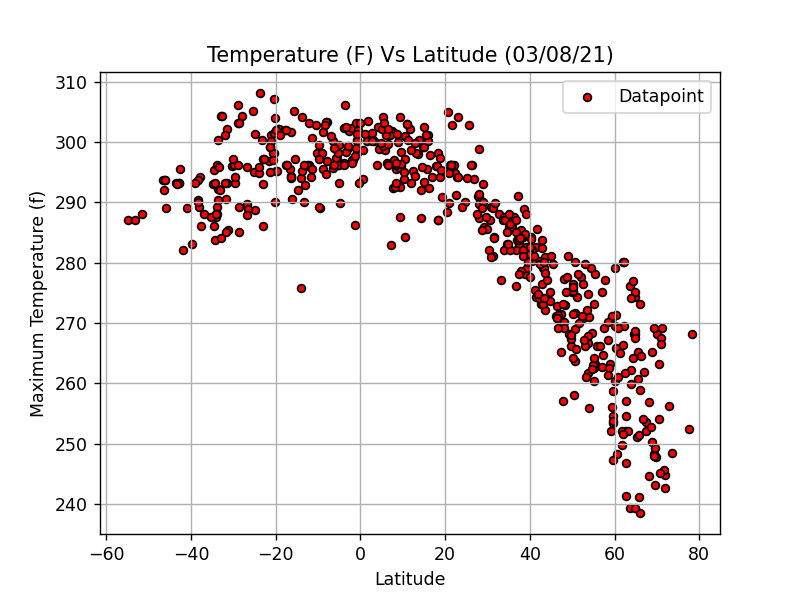

In [45]:
weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Max Temperature',
                  marker = 'o', c = 'red',
                  title = 'Temperature (F) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black',label= 'Datapoint')

plt.ylabel("Maximum Temperature (f)")
plt.savefig("Output Data/lat_vs_temp.png")
plt.show()

> - This scatter plot shows the relation between `Latitude` and `Maximum Temperature` for the cities in the list.<br>
> - With the increase in latitude(that is., above equator), the maximum temperature in the cities are getting reduced. We can see a strong relationship between Latitude and maximum Temperature in the region.

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


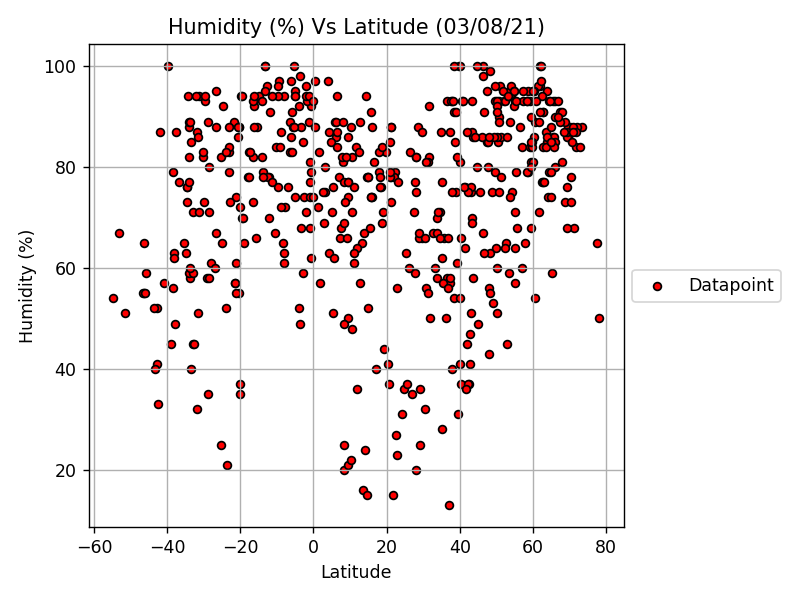

In [42]:
lat_humid = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Humidity', c= 'red',
                  title = 'Humidity (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black',label= 'Datapoint')

plt.ylabel("Humidity (%)")
lat_humid.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("Output Data/lat_vs_humidity.png")
plt.show()
plt.tight_layout()

> - This scatter plot shows the relation between `Latitude` and `Humidity` for the cities in the list.<br>
> - We could not find a specific pattern in the weather data with respect to humidity. The data is spread all over the x-axis. Latitude and humidity does not have strong relations between them.

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


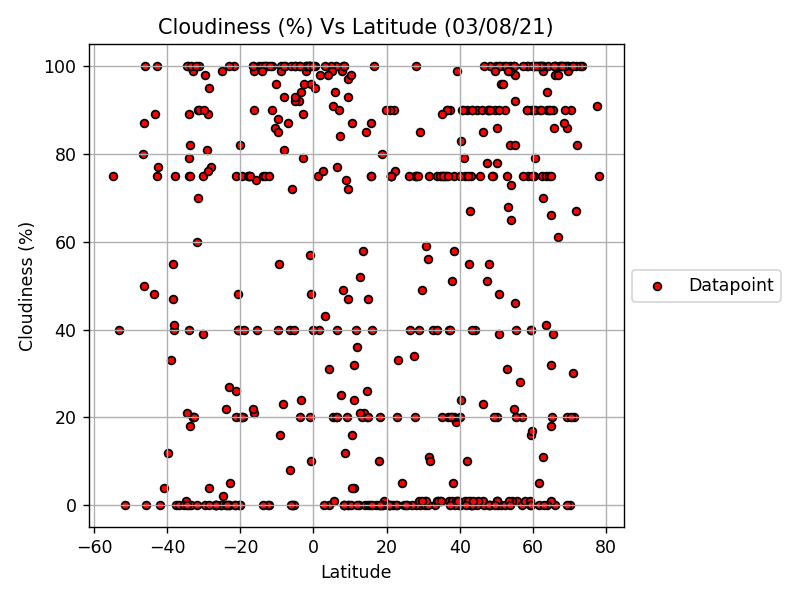

In [43]:
lat_cloud = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Cloudiness', c= 'red',
                  title = 'Cloudiness (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black',label= 'Datapoint')

lat_cloud.set_ylabel("Cloudiness (%)")
lat_cloud.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("Output Data/lat_vs_cloudiness.png")
plt.show()
plt.tight_layout()

> - This scatter plot shows the relation between `Latitude` and `Cloudiness` for the cities in the list.<br>
> - We could not find a specific pattern in the weather data with respect to Cloudiness. The data is spread all over the x-axis. Latitude and cloudiness does not have strong relations between them.

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


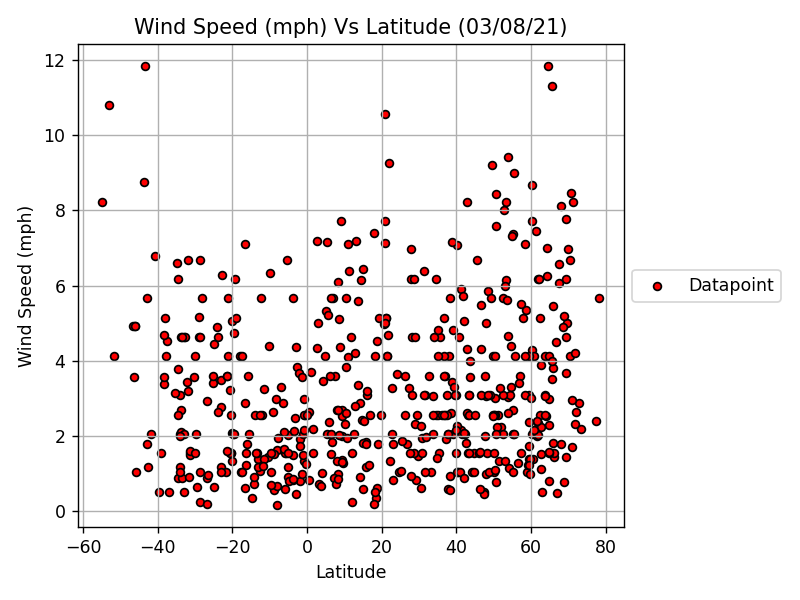

In [48]:
lat_wind_speed = weather_data.plot(kind = 'scatter',x = 'Latitude', y= 'Wind Speed',c = 'red',
                  title = 'Wind Speed (mph) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')',
                  grid = True,edgecolors='black',label= 'Datapoint')

plt.savefig("Output Data/lat_vs_wind_speed.png")
lat_wind_speed.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
lat_wind_speed.set_ylabel("Wind Speed (mph)")
plt.show()
plt.tight_layout()

> - This scatter plot shows the relation between `Latitude` and `Wind Speed` for the cities in the list.<br>
> - We could not find a specific pattern in the weather data with respect to Wind Speed. The data is spread all over the x-axis. Latitude and Wind Speed does not have strong relations between them.

## Linear Regression

In [49]:
#Weather data for cities in northern hemisphere
weather_north_hemis = weather_data.loc[weather_data['Latitude'] >= 0]
weather_north_hemis_df = weather_north_hemis.reset_index(drop = True)

#Weather data for cities in southern hemisphere
weather_south_hemis = weather_data.loc[weather_data['Latitude'] < 0]
weather_south_hemis_df = weather_south_hemis.reset_index(drop = True)

north_hemis_x = weather_north_hemis_df['Latitude']
south_hemis_x = weather_south_hemis_df['Latitude']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [1]:
north_temp_y = weather_north_hemis_df['Max Temperature']

slope_nt,intercept_nt,rvalue_nt,pvalue_nt,stderr_nt = linregress(north_hemis_x,north_temp_y)
regress_value_nt = north_hemis_x * slope_nt + intercept_nt

fig,ax1 = plt.subplots()
ax1.scatter(north_hemis_x,north_temp_y,label = "Datapoint",edgecolors = 'black')
ax1.plot(north_hemis_x,regress_value_nt,"--",color='r',label = "Linear regression")

ax1.set_title('Northern Hemisphere: Temperature (F) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Maximum Temperature (F)')
plt.legend(loc = "best")
plt.grid(True)
plt.savefig("Output Data/Images/north_hemis_lat_vs_temp.png")
plt.show()

corr_temp_n = pearsonr(north_hemis_x,north_temp_y)
print(f'The correlation coefficient between temperature and latitude in northern hemisphere is: {corr_temp_n}')

NameError: name 'weather_north_hemis_df' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


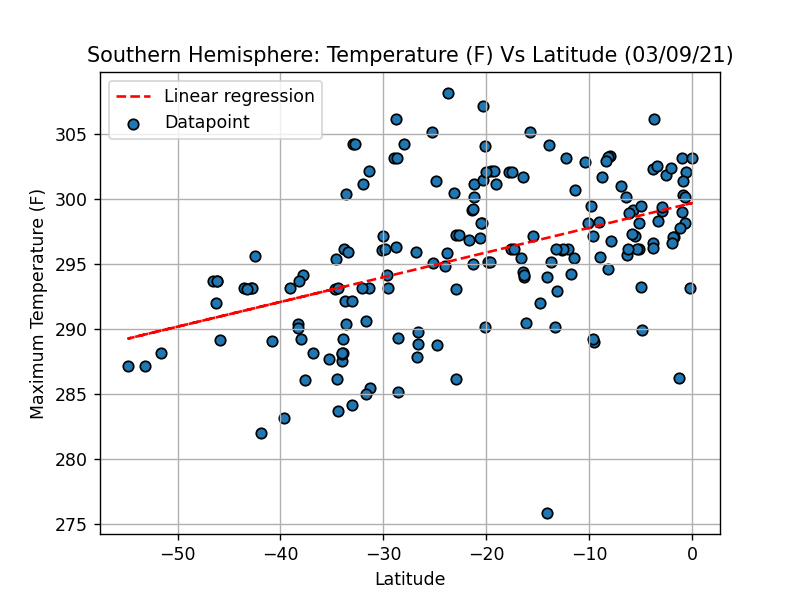

The correlation coefficient between temperature and latitude in southern hemisphere is: (0.45110497245667835, 2.9536260616653753e-10)


In [63]:
south_temp_y = weather_south_hemis_df['Max Temperature']

slope_st,intercept_st,rvalue_st,pvalue_st,stderr_st = linregress(south_hemis_x,south_temp_y)
regress_value_st = south_hemis_x * slope_st + intercept_st

fig,ax2 = plt.subplots()
ax2.scatter(south_hemis_x,south_temp_y,label = "Datapoint",edgecolors = 'black')
ax2.plot(south_hemis_x,regress_value_st,'r--',color='r',label = "Linear regression")

ax2.set_title('Southern Hemisphere: Temperature (F) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Maximum Temperature (F)')
ax2.legend(loc='upper left')
plt.grid(True)
plt.savefig("Output Data/Images/south_hemis_lat_vs_temp.png")
plt.show()

corr_temp = pearsonr(south_hemis_x,south_temp_y)
print(f'The correlation coefficient between temperature and latitude in southern hemisphere is: {corr_temp}')

> - From the plots `Northern Hemisphere - Temperature (F) vs. Latitude` & `Southern Hemisphere - Temperature (F) vs. Latitude`, we can find that the maximum temperature felt is increasing as we move towards the equator.<br>
> - In the northern hemisphere, temperature and latitude has a strong negative correlation.<br>                                
> - In the souther hemisphere, temperature and latitude has a moderate positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


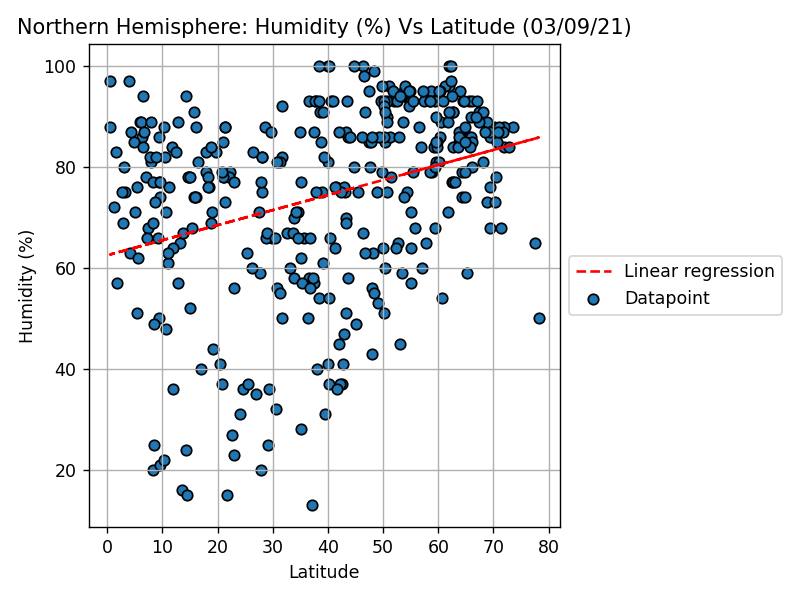

The correlation coefficient between humidity and latitude is: (0.32310584785422747, 3.056039692422247e-10)


In [69]:
north_humid_y = weather_north_hemis_df['Humidity']

slope_nh,intercept_nh,rvalue_nh,pvalue_nh,stderr_nh = linregress(north_hemis_x,north_humid_y)
regress_value_nh = north_hemis_x * slope_nh + intercept_nh

fig,ax3 = plt.subplots()
ax3.scatter(north_hemis_x,north_humid_y,label = "Datapoint",edgecolors = 'black')
ax3.plot(north_hemis_x,regress_value_nh,"--",color='r',label = "Linear regression")

ax3.set_title('Northern Hemisphere: Humidity (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Humidity (%)')
ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/north_hemis_lat_vs_humid.png")
plt.show()
plt.tight_layout()

corr_humid_n = pearsonr(north_hemis_x,north_humid_y)
print(f'The correlation coefficient between humidity and latitude is: {corr_humid_n}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


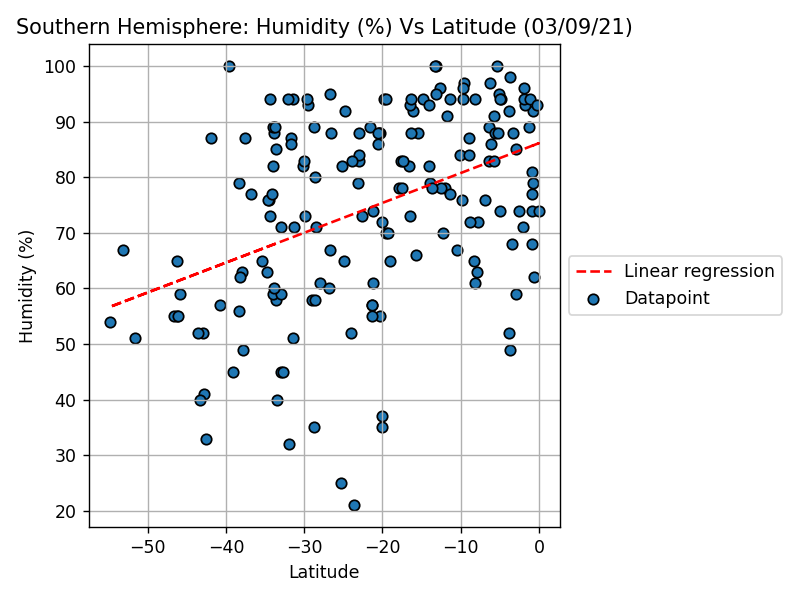

The correlation coefficient between humidity and latitude is: (0.45110497245667835, 2.9536260616653753e-10)


In [70]:
south_humid_y = weather_south_hemis_df['Humidity']

slope_sh,intercept_sh,rvalue_sh,pvalue_sh,stderr_sh = linregress(south_hemis_x,south_humid_y)
regress_value_sh = south_hemis_x * slope_sh + intercept_sh

fig,ax4 = plt.subplots()
ax4.scatter(south_hemis_x,south_humid_y,label = "Datapoint",edgecolors = 'black')
ax4.plot(south_hemis_x,regress_value_sh,"--",color='r',label = "Linear regression")

ax4.set_title('Southern Hemisphere: Humidity (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Humidity (%)')
ax4.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/south_hemis_lat_vs_humid.png")
plt.show()
plt.tight_layout()

corr_humid_s = pearsonr(south_hemis_x,south_temp_y)
print(f'The correlation coefficient between humidity and latitude is: {corr_humid_s}')

> - From the plots `Northern Hemisphere - Humidity vs. Latitude` & `Southern Hemisphere - Humidity vs. Latitude`, we can find that there is not much strong relation between data.<br>
> - In the northern hemisphere, humidity and latitude has a week positive correlation.<br>
> - In the souther hemisphere, humidity and latitude has a moderate positive correlation.<br>
> - It concludes that humidity and latitude are not correlated.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


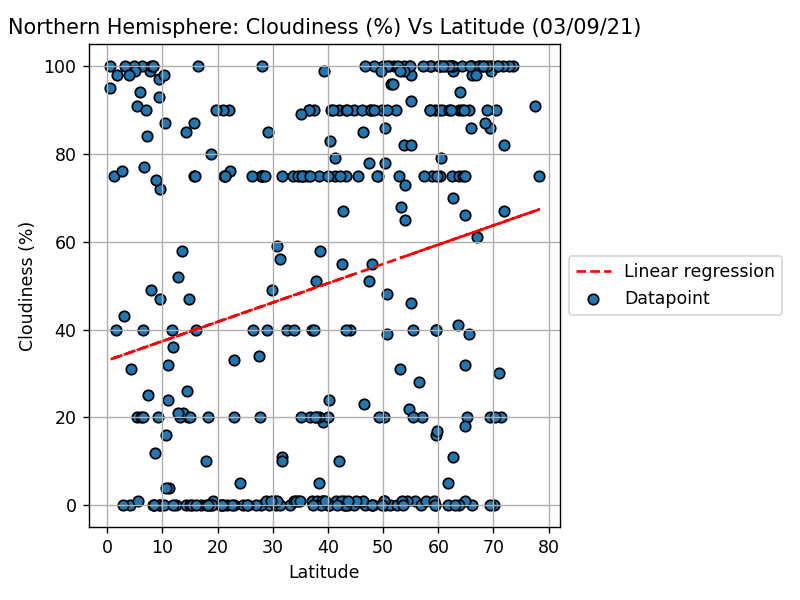

The correlation coefficient between humidity and latitude is: (0.2287395382027117, 1.1055612386814283e-05)


In [72]:
north_cloud_y = weather_north_hemis_df['Cloudiness']

slope_nc,intercept_nc,rvalue_nc,pvalue_nc,stderr_nc = linregress(north_hemis_x,north_cloud_y)
regress_value_nc = north_hemis_x * slope_nc + intercept_nc

fig,ax5 = plt.subplots()
ax5.scatter(north_hemis_x,north_cloud_y,label = "Datapoint",edgecolors = 'black')
ax5.plot(north_hemis_x,regress_value_nc,"--",color='r',label = "Linear regression")

ax5.set_title('Northern Hemisphere: Cloudiness (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax5.set_xlabel('Latitude')
ax5.set_ylabel('Cloudiness (%)')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/north_hemis_lat_vs_cloud.png")
plt.show()
plt.tight_layout()

corr_cloud_n = pearsonr(north_hemis_x,north_cloud_y)
print(f'The correlation coefficient between cloudiness and latitude is: {corr_cloud_n}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


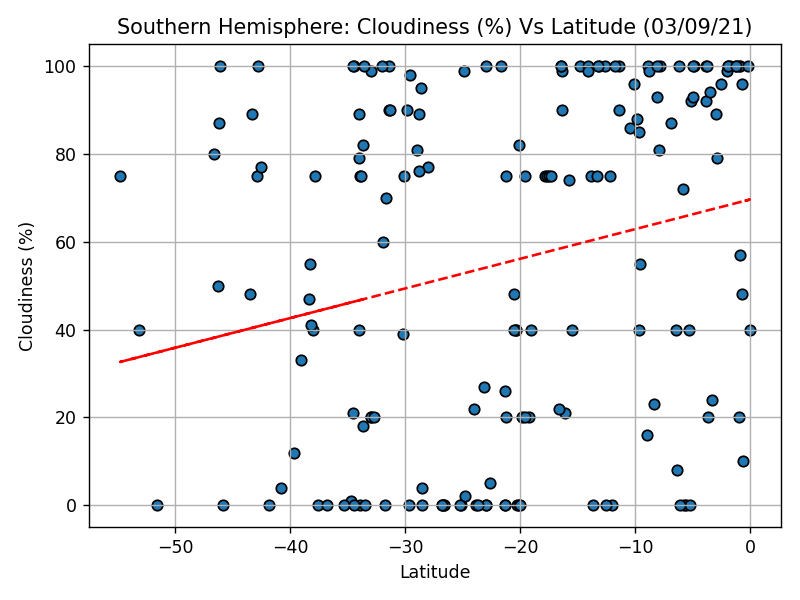

The correlation coefficient between cloudiness and latitude is: (0.2336471706380076, 0.0017487381685976585)


In [73]:
south_cloud_y = weather_south_hemis_df['Cloudiness']

slope_sc,intercept_sc,rvalue_sc,pvalue_sc,stderr_sc = linregress(south_hemis_x,south_cloud_y)
regress_value_sc = south_hemis_x * slope_sc + intercept_sc

fig,ax6 = plt.subplots()
ax6.scatter(south_hemis_x,south_cloud_y,label = "Datapoint",edgecolors = 'black')
ax6.plot(south_hemis_x,regress_value_sc,"--",color='r',label = "Linear regression")

ax6.set_title('Southern Hemisphere: Cloudiness (%) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax6.set_xlabel('Latitude')
ax6.set_ylabel('Cloudiness (%)')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/south_hemis_lat_vs_cloud.png")
plt.show()
plt.tight_layout()

corr_cloud_s = pearsonr(south_hemis_x,south_cloud_y)
print(f'The correlation coefficient between cloudiness and latitude is: {corr_cloud_s}')


> - From the plots `Northern Hemisphere - Cloudiness vs. Latitude` & `Southern Hemisphere - Cloudiness vs. Latitude`, we can find that there is not much strong relation between data.
> - In the northern hemisphere, Cloudiness and latitude has a week positive correlation.
> - In the souther hemisphere, Cloudiness and latitude has a week positive correlation.
> - It concludes that Cloudiness and latitude are not correlated.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


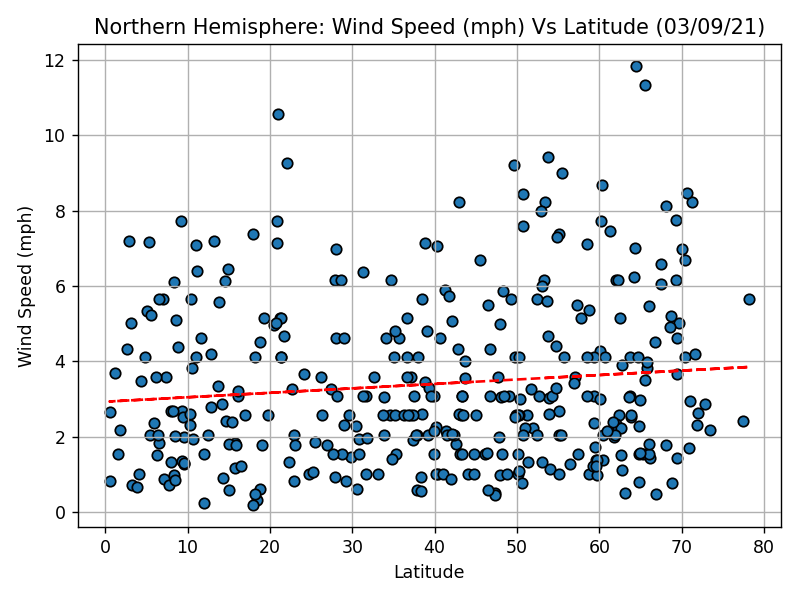

The correlation coefficient between wind speed and latitude is: (0.1104116721510344, 0.035739040591970556)


In [75]:
north_wind_speed_y = weather_north_hemis_df['Wind Speed']

slope_nws,intercept_nws,rvalue_nws,pvalue_nws,stderr_nws = linregress(north_hemis_x,north_wind_speed_y)
regress_value_nws = north_hemis_x * slope_nws + intercept_nws

fig,ax7 = plt.subplots()
ax7.scatter(north_hemis_x,north_wind_speed_y,label = "Datapoint",edgecolors = 'black')
ax7.plot(north_hemis_x,regress_value_nws,"--",color='r',label = "Linear regression")

ax7.set_title('Northern Hemisphere: Wind Speed (mph) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax7.set_xlabel('Latitude')
ax7.set_ylabel('Wind Speed (mph)')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/north_hemis_lat_vs_windSpeed.png")
plt.show()
plt.tight_layout()

corr_wind_speed_n = pearsonr(north_hemis_x,north_wind_speed_y)
print(f'The correlation coefficient between wind speed and latitude is: {corr_wind_speed_n}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


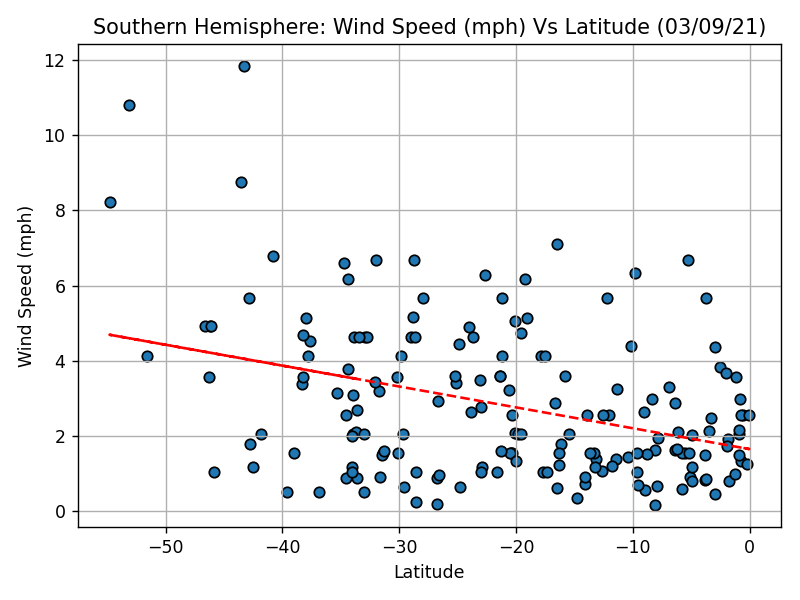

The correlation coefficient between wind speed and latitude is: (0.2336471706380076, 0.0017487381685976585)


In [76]:
south_wind_speed_y = weather_south_hemis_df['Wind Speed']

slope_sws,intercept_sws,rvalue_sws,pvalue_sws,stderr_sws = linregress(south_hemis_x,south_wind_speed_y)
regress_value_sws = south_hemis_x * slope_sws + intercept_sws

fig,ax8 = plt.subplots()
ax8.scatter(south_hemis_x,south_wind_speed_y,label = "Datapoint",edgecolors = 'black')
ax8.plot(south_hemis_x,regress_value_sws,"--",color='r',label = "Linear regression")

ax8.set_title('Southern Hemisphere: Wind Speed (mph) Vs Latitude ('+ date.today().strftime("%m/%d/%y") + ')')
ax8.set_xlabel('Latitude')
ax8.set_ylabel('Wind Speed (mph)')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.savefig("Output Data/Images/south_hemis_lat_vs_windSpeed.png")
plt.show()
plt.tight_layout()

corr_wind_speed_s = pearsonr(south_hemis_x,south_cloud_y)
print(f'The correlation coefficient between wind speed and latitude is: {corr_wind_speed_s}')

> - From the plots `Northern Hemisphere - wind speed vs. Latitude` & `Southern Hemisphere - wind speed vs. Latitude`, we can find that there is not much strong relation between data.<br>
> - In the northern hemisphere, wind speed and latitude has a week positive correlation.<br>
> - In the souther hemisphere, wind speed and latitude has a week positive correlation.<br>
> - It concludes that wind speed and latitude are not correlated.